# ***🦠 Analysis of COVID-19***

----
🔗 Dataset

* Dataset link="https://drive.google.com/file/d/1TJdxCYLWOIDB4UPzXiLIOAfe1Sibmi6r/view?usp=sharing"
* Format: CSV
* Records: Daily confirmed, deaths, recovered, and active cases
* Coverage: Global data with detailed records for India

---

🎯 Objective

* Analyze global and national COVID-19 trends
* Understand infection, recovery, and mortality rates
* Forecast future case numbers using time-series modeling

---

🧠 Project Overview

This project uses real-world COVID-19 data to visualize trends, identify top-affected countries, and forecast future cases using machine learning. It includes geospatial visualizations and predictive modeling.

---

🔍 Key Steps & Findings
1. Data Loading & Cleaning


* *Importing required libraries*

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 *Load dataset*

In [86]:
df=pd.read_csv("/content/covid_19.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [88]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


* Dataset contains 49068 rows × 10 columns
* These columns have object Datatype
   * Province/State   
   * Country/Region
   * WHO Region    

In [89]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


*   Missing values detected (df.isnull().sum())
    Drop column = Province/State because it is not useful



In [90]:
df.drop(columns='Province/State',inplace=True)

In [91]:
df.duplicated().sum()

np.int64(0)

* There are no duplicates

In [92]:
df.rename(columns={'Country/Region':'Country'},inplace=True)

In [93]:
df

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [94]:
df.Date.value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


max date is 27 july 2020

* Top counties by last date

In [95]:
top=df[df['Date']=='2020-07-27']

In [96]:
top

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


* Grouping by Countries

In [97]:
df1=top.groupby(by='Country')[['Confirmed' ,'Deaths'	,'Recovered','Active']].sum().reset_index()

In [98]:
df1

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [99]:
Confirmed=df.groupby(by='Date')[['Confirmed']].sum().reset_index()

In [100]:
Confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [101]:
active=df.groupby(by='Country')[['Active']].sum().reset_index()

In [102]:
death=df.groupby(by='Country')[['Deaths']].sum().reset_index()

In [103]:
recoverd=df.groupby(by='Country')[['Recovered']].sum().reset_index()

In [104]:
a=(recoverd.sort_values(by='Recovered',ascending=False)).head(10)

In [105]:
b= (death.sort_values(by='Deaths',ascending=False)).head(10)

In [106]:
c= (active.sort_values(by='Active',ascending=False)).head(10)

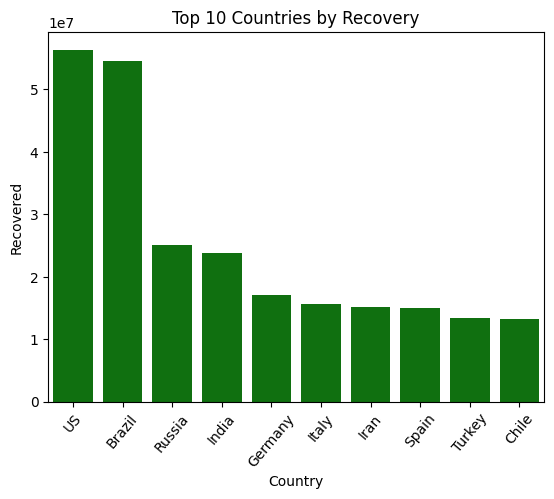

In [107]:
sns.barplot(data=a, x='Country', y='Recovered',color='green')
plt.xticks(rotation=50)
plt.title('Top 10 Countries by Recovery')
plt.show()

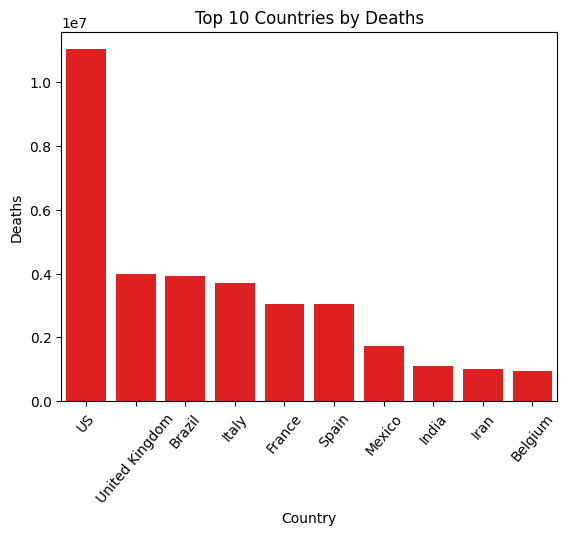

In [108]:
sns.barplot(data=b, x='Country', y='Deaths',color='red')
plt.xticks(rotation=50)
plt.title('Top 10 Countries by Deaths')
plt.show()

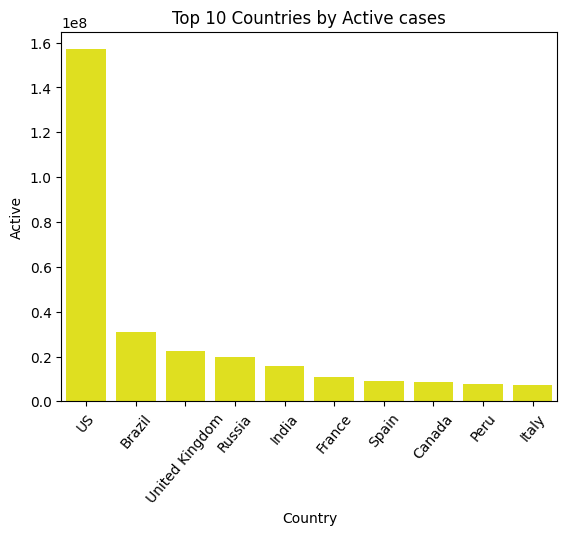

In [109]:
sns.barplot(data=c, x='Country', y='Active',color='yellow')
plt.xticks(rotation=50)
plt.title('Top 10 Countries by Active cases')
plt.show()

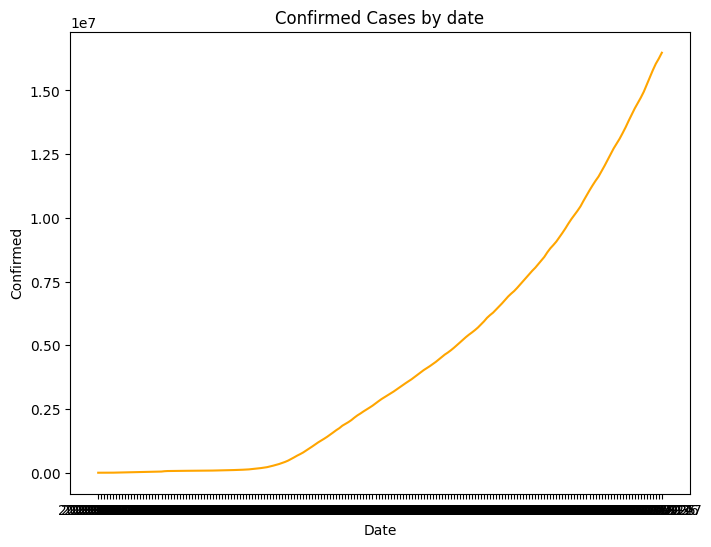

In [110]:
plt.figure(figsize=(8,6))
sns.lineplot(data=Confirmed,x='Date',y='Confirmed',color='orange')
plt.title('Confirmed Cases by date')
plt.show()

looking specific for Us and India

In [111]:
df_india= df[df['Country']=='India']

In [112]:
US = df[df['Country']=='US']

<Axes: xlabel='None', ylabel='Confirmed'>

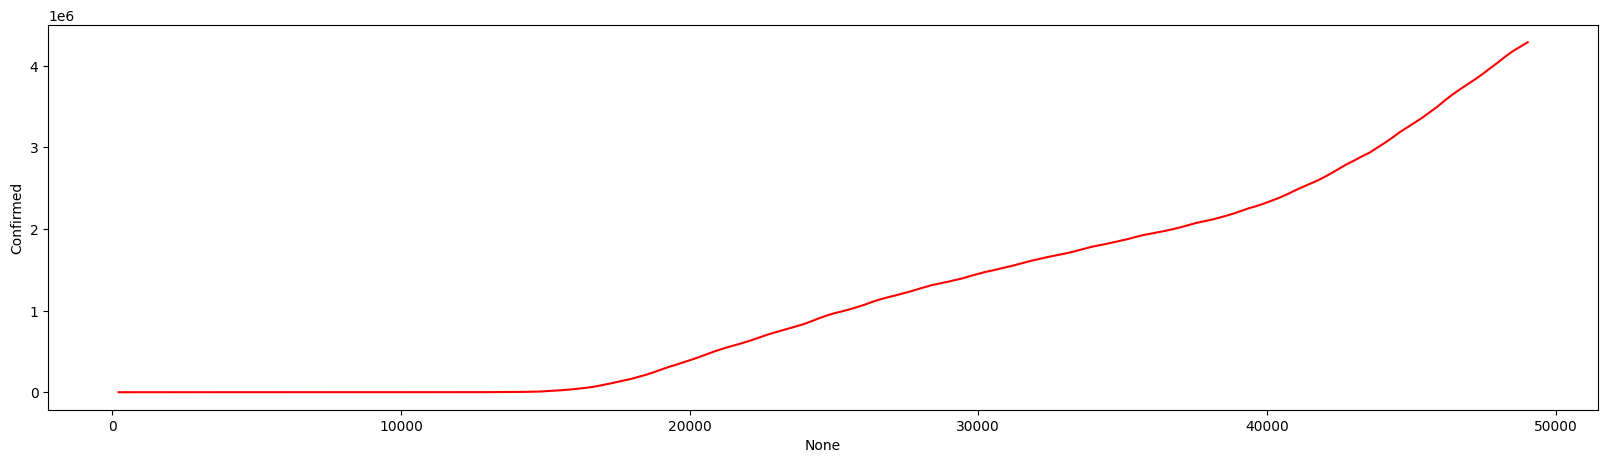

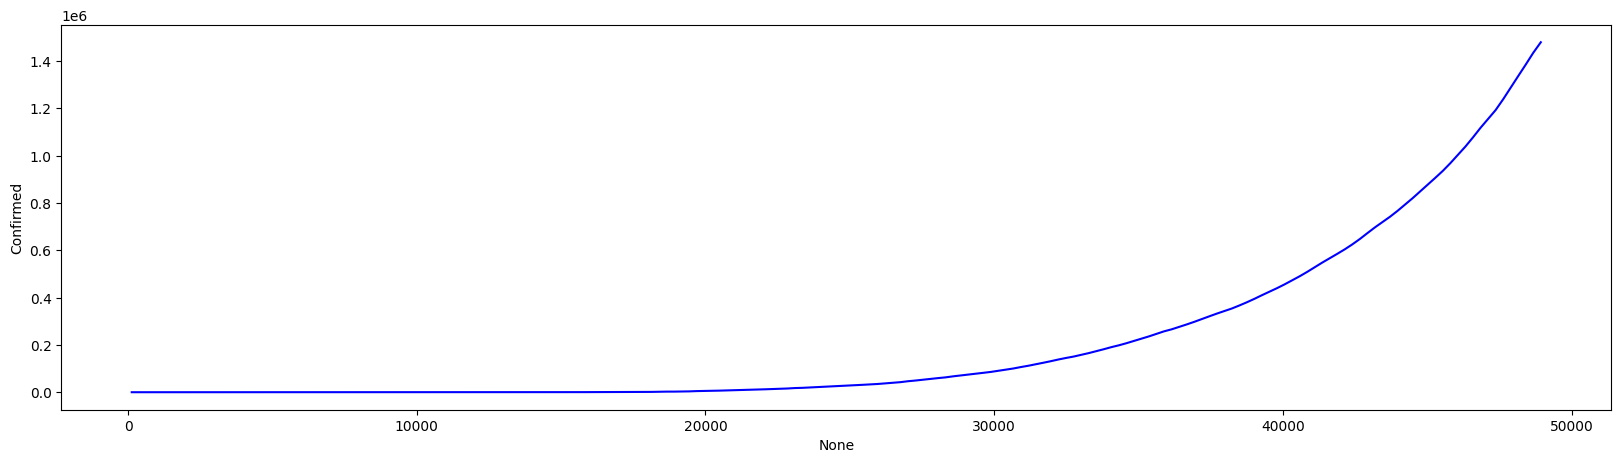

In [113]:
plt.figure(figsize = (20,5))
sns.lineplot(data = US, x=US.index,y=US.Confirmed, color = 'Red')

plt.figure(figsize = (20,5))
sns.lineplot(data = df_india, x=df_india.index,y=df_india.Confirmed, color = 'Blue')


3. preprocessing for prophet model

----

In [114]:
Deaths=df.groupby(by='Date')[['Deaths']].sum().reset_index()

In [115]:
Confirmed=df.groupby(by='Date')[['Confirmed']].sum().reset_index()

In [116]:
Deaths.columns=['ds','y']

In [117]:
Deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [118]:
Confirmed.columns=['ds','y']

In [119]:
Confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


Prophet model building

In [120]:
from prophet import Prophet

In [121]:
model=Prophet()

In [122]:
model.fit(Confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6fgxqbhl/uwjos803.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6fgxqbhl/m01niz7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18436', 'data', 'file=/tmp/tmp6fgxqbhl/uwjos803.json', 'init=/tmp/tmp6fgxqbhl/m01niz7l.json', 'output', 'file=/tmp/tmp6fgxqbhl/prophet_model79cz093h/prophet_model-20250626104005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:40:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [123]:
future = model.make_future_dataframe(periods=7)

In [124]:
forecast=model.predict(future)

In [125]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.216108e+05,8.103018e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.150927e+05,9.774382e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.912712e+04,1.120531e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.917274e+04,1.148153e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.463097e+04,1.195106e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663321e+07,1.685289e+07,1.673792e+07,1.674976e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685086e+07,1.706379e+07,1.693617e+07,1.696007e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.704922e+07,1.726977e+07,1.713248e+07,1.717301e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725541e+07,1.747572e+07,1.732525e+07,1.738514e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [126]:
f=forecast[['ds','yhat','yhat_upper','yhat_lower']]

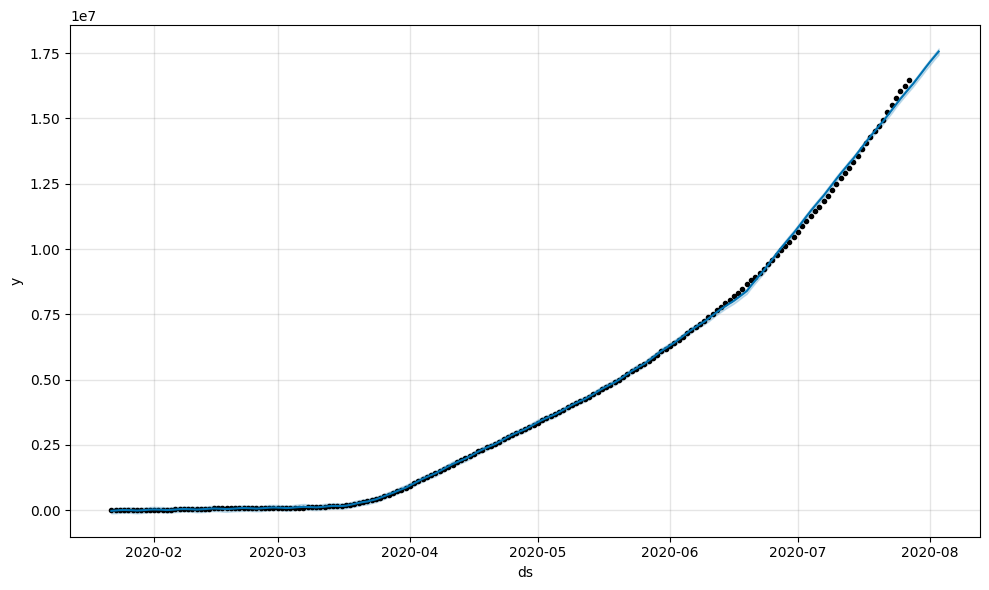

In [130]:
model.plot(f)
plt.show()

In [128]:
import plotly
import plotly.express as px

In [47]:
df

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [48]:
world =df.groupby(by='Country')[['Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active','WHO Region']].sum().reset_index()

In [49]:
world

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,6380.552680,12729.471164,2020-01-222020-01-232020-01-242020-01-252020-0...,1936390,49098,798240,1089052,Eastern MediterraneanEastern MediterraneanEast...
1,Albania,7736.820400,3791.640400,2020-01-222020-01-232020-01-242020-01-252020-0...,196702,5708,118877,72117,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...
2,Algeria,5270.373200,312.004800,2020-01-222020-01-232020-01-242020-01-252020-0...,1179755,77972,755897,345886,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...
3,Andorra,7991.184400,286.098400,2020-01-222020-01-232020-01-242020-01-252020-0...,94404,5423,69074,19907,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...
4,Angola,-2106.107600,3360.293200,2020-01-222020-01-232020-01-242020-01-252020-0...,22662,1078,6573,15011,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...
...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,6007.013600,6623.841600,2020-01-222020-01-232020-01-242020-01-252020-0...,233461,1370,61124,170967,Eastern MediterraneanEastern MediterraneanEast...
183,Western Sahara,4552.514000,-2422.530400,2020-01-222020-01-232020-01-242020-01-252020-0...,901,63,648,190,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...
184,Yemen,2923.912676,9121.080944,2020-01-222020-01-232020-01-242020-01-252020-0...,67180,17707,23779,25694,Eastern MediterraneanEastern MediterraneanEast...
185,Zambia,-2469.172636,5235.674416,2020-01-222020-01-232020-01-242020-01-252020-0...,129421,2643,83611,43167,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...


In [50]:
df.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'WHO Region'],
      dtype='object')

MAP visualisation using plotly

In [51]:
fig=px.choropleth(world,locations='Country',locationmode='country names',color='Active', hover_data=['Deaths','Recovered'],color_continuous_scale='Viridis')
fig.show()

<Axes: >

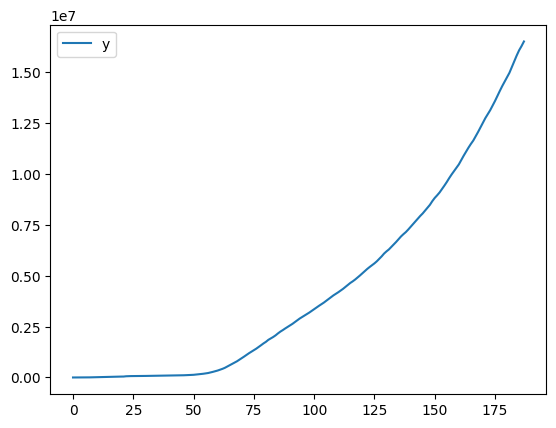

In [52]:
Confirmed.plot()

ARIMA MODEL BUILDING

----

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

In [54]:
df1=df.groupby(by='Date')[['Confirmed']].sum().reset_index()

In [55]:
df1.set_index("Date", inplace = True)

In [56]:
df1

,Confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-07-23,15510481
2020-07-24,15791645
2020-07-25,16047190


Figure(640x480)


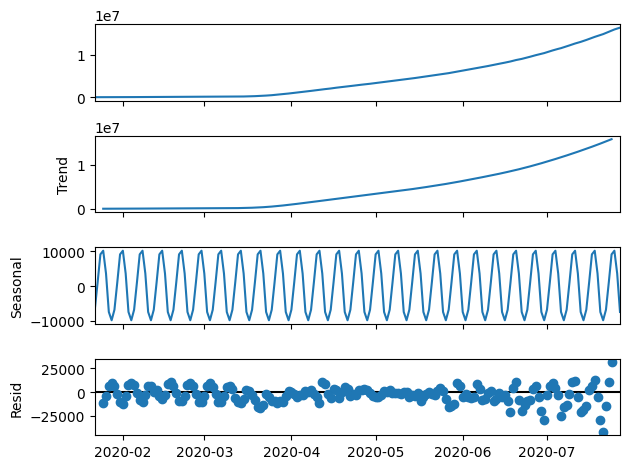

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df1)
print(decomposed.plot())

In [58]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df1)

In [59]:
p_val=test_result[1]
p_val

np.float64(0.9987419829144141)

In [60]:
if p_val <0.05:
  print('data is stationary')
else:
  print("data is not stationary")

data is not stationary


<Axes: xlabel='Date'>

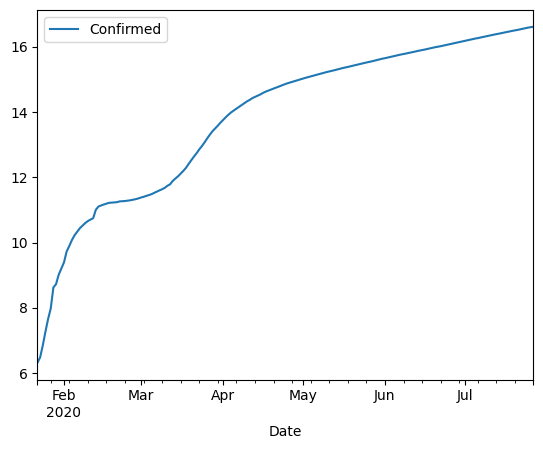

In [61]:
first_log =np.log(df1)
first_log = first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'rolling mean & rolling std')

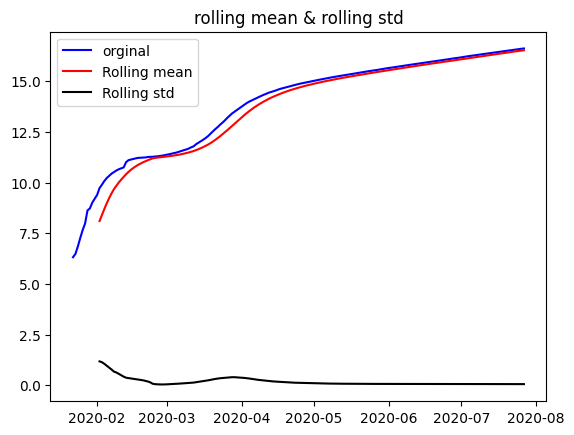

In [62]:
mean_log = first_log.rolling(window = 12).mean()
std_log = first_log.rolling(window = 12).std()

plt.plot(first_log,color='blue',label ='orginal')
plt.plot(mean_log,color='red',label ='Rolling mean')
plt.plot(std_log,color='black',label ='Rolling std')
plt.legend(loc='best')
plt.title("rolling mean & rolling std")

In [63]:
new_data = first_log - mean_log
new_data =  new_data.dropna()
new_data.head(20)

,Confirmed
Date,
2020-02-02,1.623875
2020-02-03,1.495099
2020-02-04,1.378957
2020-02-05,1.242853
2020-02-06,1.095467
2020-02-07,0.971885
2020-02-08,0.836938
2020-02-09,0.751068
2020-02-10,0.651313


Text(0.5, 1.0, 'rolling mean & rolling std')

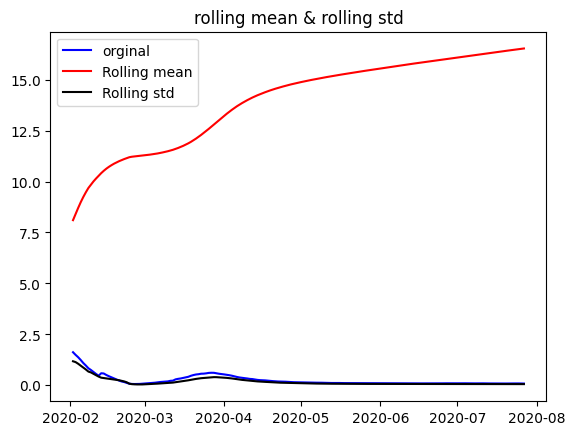

In [64]:
plt.plot(new_data,color='blue',label ='orginal')
plt.plot(mean_log,color='red',label ='Rolling mean')
plt.plot(std_log,color='black',label ='Rolling std')
plt.legend(loc='best')
plt.title("rolling mean & rolling std")

<Axes: xlabel='Date'>

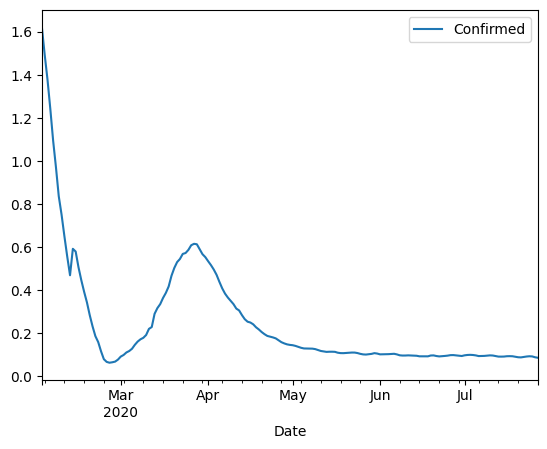

In [65]:
new_data.plot()

In [66]:
result = adfuller(new_data)

In [67]:
pval = result[1]
pval

np.float64(0.00045256727236144445)

In [68]:
new_data

,Confirmed
Date,
2020-02-02,1.623875
2020-02-03,1.495099
2020-02-04,1.378957
2020-02-05,1.242853
2020-02-06,1.095467
...,...
2020-07-23,0.092401
2020-07-24,0.093606
2020-07-25,0.092796


In [69]:
train = new_data.iloc[:141]['Confirmed']
test = new_data.iloc[141:]['Confirmed']

In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
from sklearn.metrics import *

In [72]:
#itertools
import itertools
p = range(0,7)
d= range(1,2)
q=range(0,7)
pdq = list(itertools.product(p,d,q))
rmse = []
order1 = []
for i in pdq:
  model = ARIMA(train,order = i)
  model_fit = model.fit()
  pred = model_fit.predict(start = len(train),end = len(train)+len(test)-1) #start = 120, end = (120+13)-1 = 132 #0-132
  error = np.sqrt(mean_squared_error(test,pred))
  order1.append(i)
  rmse.append(error)
results = pd.DataFrame(index = order1,data = rmse,columns =['RMSE'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred freq

In [73]:
(results.sort_values(by = 'RMSE',ascending = True)).head(10)

,RMSE
"(0, 1, 0)",0.003318
"(0, 1, 1)",0.003413
"(0, 1, 2)",0.004867
"(0, 1, 3)",0.005738
"(1, 1, 6)",0.006099
"(1, 1, 5)",0.006100
"(0, 1, 4)",0.006240
"(0, 1, 6)",0.006893
"(2, 1, 6)",0.006963
"(2, 1, 5)",0.007671


In [74]:
A_model = ARIMA(train,order=(0,1,0))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [75]:
A_model = A_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [76]:
new_data["ARIMA_Predictions"] = A_model.predict(start = len(train),end = len(train)+len(test)-1)

<Axes: xlabel='Date'>

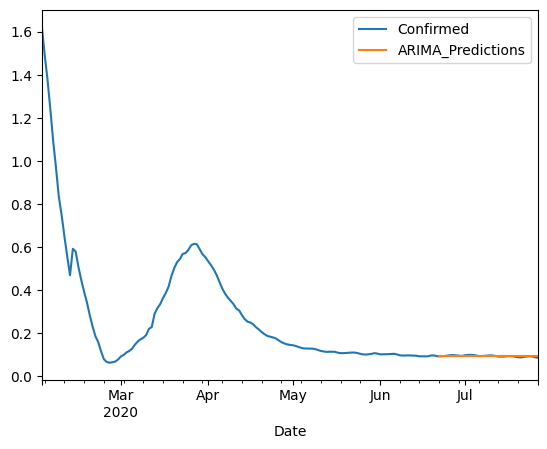

In [77]:
new_data[['Confirmed','ARIMA_Predictions']].plot()

SARIMA model building

-----

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [79]:
model = SARIMAX(train,order =(0,1,0),seasonal_order= (0,1,0,7))
model =model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [80]:
new_data['SARIMA_Predictions'] =model.predict(start = len(train),end = len(train)+len(test)-1)

<Axes: xlabel='Date'>

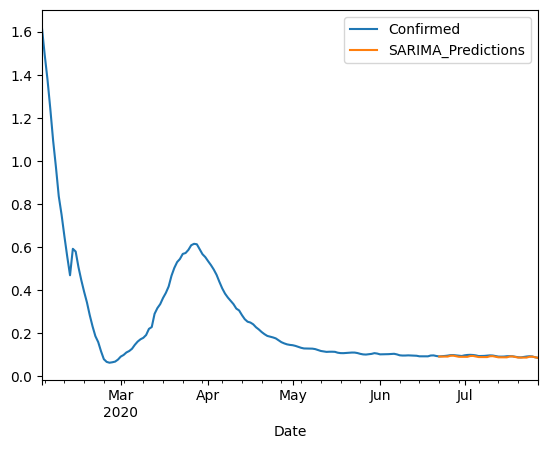

In [81]:
new_data[['Confirmed','SARIMA_Predictions']].plot()

In [82]:
new_data

,Confirmed,ARIMA_Predictions,SARIMA_Predictions
Date,,,
2020-02-02,1.623875,NaN,NaN
2020-02-03,1.495099,NaN,NaN
2020-02-04,1.378957,NaN,NaN
2020-02-05,1.242853,NaN,NaN
2020-02-06,1.095467,NaN,NaN
...,...,...,...
2020-07-23,0.092401,0.094708,0.087439
2020-07-24,0.093606,0.094708,0.091272
2020-07-25,0.092796,0.094708,0.091730


<Axes: xlabel='Date'>

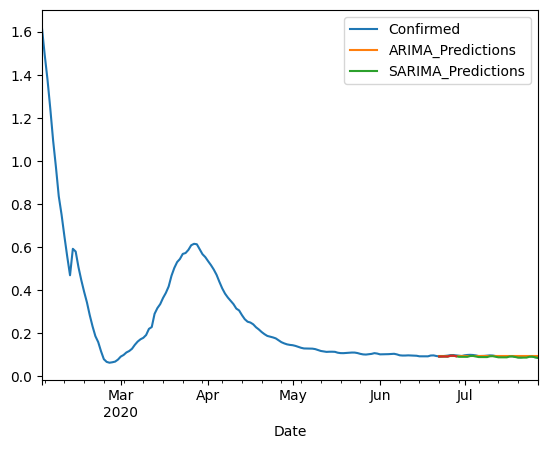

In [83]:
#predict for next 5 years---12*5 = 60months
future = model.forecast(steps = 7)
new_data.plot()
future.plot()

In [84]:
new_data = new_data.dropna()

# Separate actual values and predictions
actual = new_data['Confirmed']
arima_pred = new_data['ARIMA_Predictions']
sarima_pred = new_data['SARIMA_Predictions']

# Calculate MAE and RMSE for both models
arima_mae = mean_absolute_error(actual, arima_pred)
sarima_mae = mean_absolute_error(actual, sarima_pred)

arima_rmse = np.sqrt(mean_squared_error(actual, arima_pred))
sarima_rmse = np.sqrt(mean_squared_error(actual, sarima_pred))

# Create comparison table
results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA'],
    'MAE': [arima_mae, sarima_mae],
    'RMSE': [arima_rmse, sarima_rmse]
})

# Determine better model
better_model = 'SARIMA' if sarima_mae < arima_mae and sarima_rmse < arima_rmse else 'ARIMA'
better_model

'ARIMA'

ARIMA HAS GOOD ACCURACY

# Thankyou for making time and visting my project

Personal Details :

----
* Name:           Biradar Akshay Bhimashankar
* Role:           student
* Email:          abbiradarakshay@gmail.com
* GitHub:         github.com/abcreativeakshay
* LinkedIn:       linkedin.com/in/abcreativeakshay
----